In [1]:
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('data/all_features_v2_dataset_no_header.xlsx')

X = data.iloc[:,0:13]  # features
Y = data.iloc[:,-1]    # label column

In [2]:
# 10% test, 90% train
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.1,random_state=109)

# Transforming non numerical labels into numerical labels
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train)
y_train = encoder.transform(Y_train)

# encoding test labels 
encoder.fit(Y_test)
y_test = encoder.transform(Y_test)

# Scaling the Train and Test feature set 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

skf = StratifiedKFold(n_splits=10)


In [ ]:
t = time()

#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True, C=100) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

print('Time train: {} mins'.format(round((time() - t) / 60, 2)))

In [4]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.739065180102916
Precision: 0.739065180102916
Recall: 0.739065180102916


In [5]:
Y_pred_label = list(encoder.inverse_transform(y_pred))

# Making the Confusion Matrix
confusion_matrix_res = confusion_matrix(Y_test,Y_pred_label)
print(confusion_matrix_res)
print("\n")
print(classification_report(Y_test,Y_pred_label))

cross_val_score_result = cross_val_score(clf, X_test, y_test, cv=10)

print(cross_val_score_result)

[[  22    0    0    5    0    1    3    0   10]
 [   0  201    0   16    1   10   15   11   41]
 [   0    3    8   13    0   11   13    7   33]
 [   0    0    1 1751   32   46  426    0   39]
 [   1    0    0   54  113    6   16    3   29]
 [   2    1    0  146   11  300  113   49  118]
 [   2    0    0  304   12   26 3556    0   65]
 [   0    1    1   27    0   35   54  227   82]
 [   2   20    2  115   10   81  257   52  716]]


              precision    recall  f1-score   support

    Currency       0.76      0.54      0.63        41
    DateTime       0.89      0.68      0.77       295
       Event       0.67      0.09      0.16        88
    Location       0.72      0.76      0.74      2295
 Nationality       0.63      0.51      0.56       222
Organization       0.58      0.41      0.48       740
      Person       0.80      0.90      0.84      3965
  PersonType       0.65      0.53      0.59       427
       Thing       0.63      0.57      0.60      1255

    accuracy           

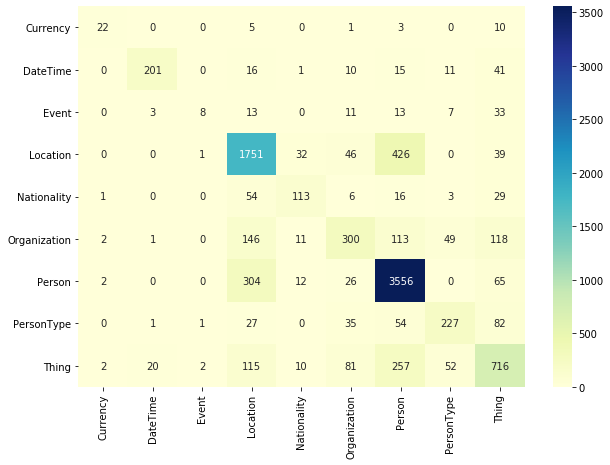

In [6]:
labels = ['Currency', 'DateTime', 'Event', 'Location', 'Nationality', 'Organization', 'Person', 'PersonType', 'Thing']

df_cm = pd.DataFrame(confusion_matrix_res, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")


In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


probs = clf.predict_proba(X_test_scaled)
prob_per_class_dictionary = dict(zip(clf.classes_, probs))
#print(prob_per_class_dictionary)
#print(probs)

{0: array([0.00064173, 0.00290019, 0.00150028, 0.1647322 , 0.00431801,
       0.2318615 , 0.5532212 , 0.02044678, 0.0203781 ]), 1: array([2.79874781e-04, 5.06338416e-03, 2.07320223e-03, 2.15566756e-01,
       8.26850521e-03, 1.06319175e-02, 6.01671345e-01, 8.40747545e-03,
       1.48037539e-01]), 2: array([0.0030159 , 0.00642904, 0.00494176, 0.82662522, 0.00166555,
       0.11434679, 0.02133989, 0.00264683, 0.01898904]), 3: array([2.96102351e-04, 2.88353808e-03, 3.55965590e-03, 7.05543021e-01,
       4.22639907e-03, 7.27877509e-03, 1.24300195e-01, 3.63324536e-03,
       1.48279068e-01]), 4: array([0.00076866, 0.00629843, 0.00481006, 0.40846369, 0.00073979,
       0.01916689, 0.5405168 , 0.00659276, 0.01264291]), 5: array([0.00051746, 0.00514362, 0.00278166, 0.35804901, 0.04423021,
       0.04580237, 0.38989538, 0.0304172 , 0.12316309]), 6: array([0.00104655, 0.0030116 , 0.00099177, 0.74485885, 0.00243597,
       0.0060928 , 0.18951352, 0.00207356, 0.04997538]), 7: array([1.63693061e-04

In [58]:
import numpy as np
from scipy.interpolate import interp1d
from sklearn.metrics import auc
from itertools import cycle

metrics.plot_roc_curve(clf, X_test, y_test)

print(y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ValueError: SVC should be a binary classifer

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sn.despine()
    plt.show()

    
plot_multiclass_roc(clf, X_test, y_test, n_classes=9, figsize=(16, 10))

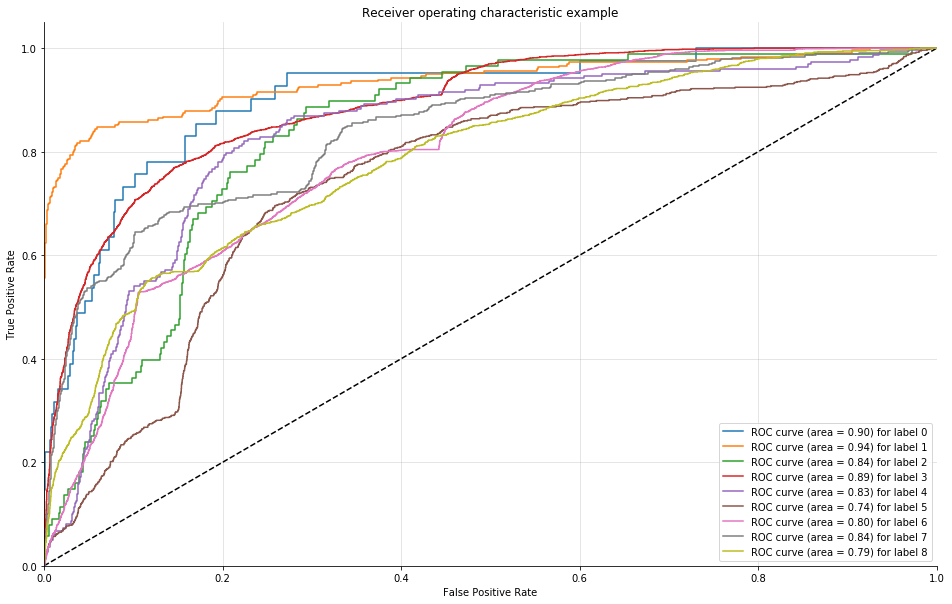

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sn.despine()
    plt.show()

    
plot_multiclass_roc(clf, X_test, y_test, n_classes=9, figsize=(16, 10))